<a href="https://colab.research.google.com/github/sidchaubey/Pratice_Python/blob/master/EDA_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

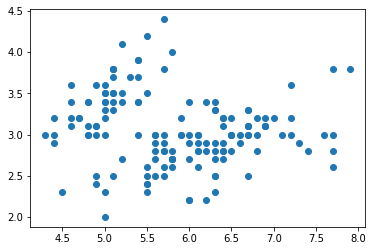

In [10]:
plt.scatter("sepal_length", "sepal_width",data=df);

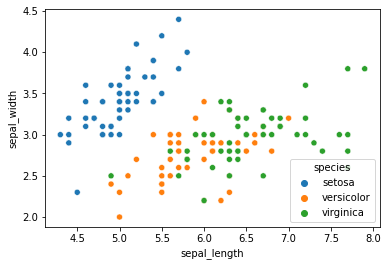

In [14]:
sns.scatterplot(x="sepal_length", y="sepal_width",data=df, hue="species");

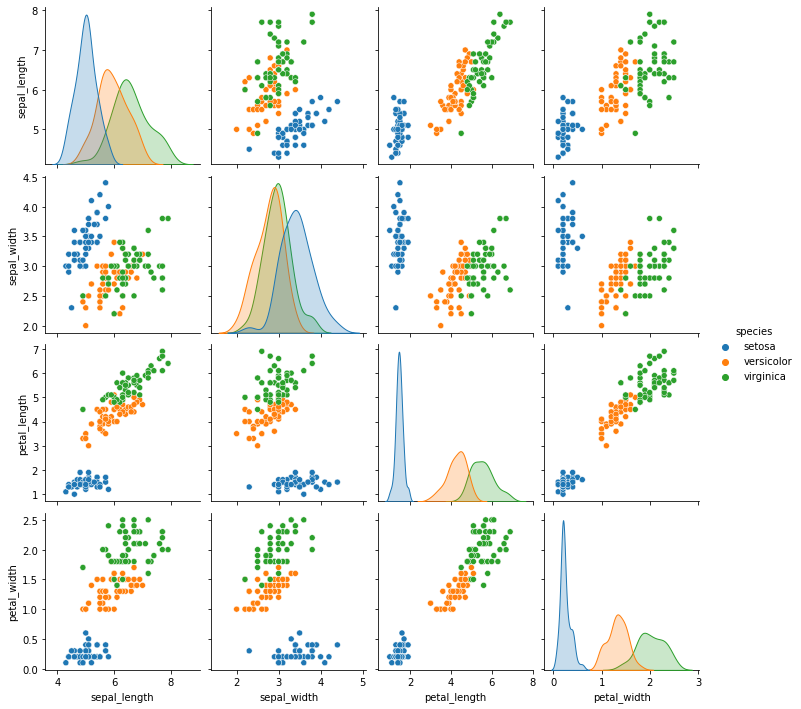

In [16]:
sns.pairplot(df, hue="species");

In [19]:
# PDF, CDF, Histogram


df_setosa = df.loc[df["species"]=="setosa"]
df_versicolor = df.loc[df["species"]=="versicolor"]
df_setosa = df.loc[df["species"]=="virginica"]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


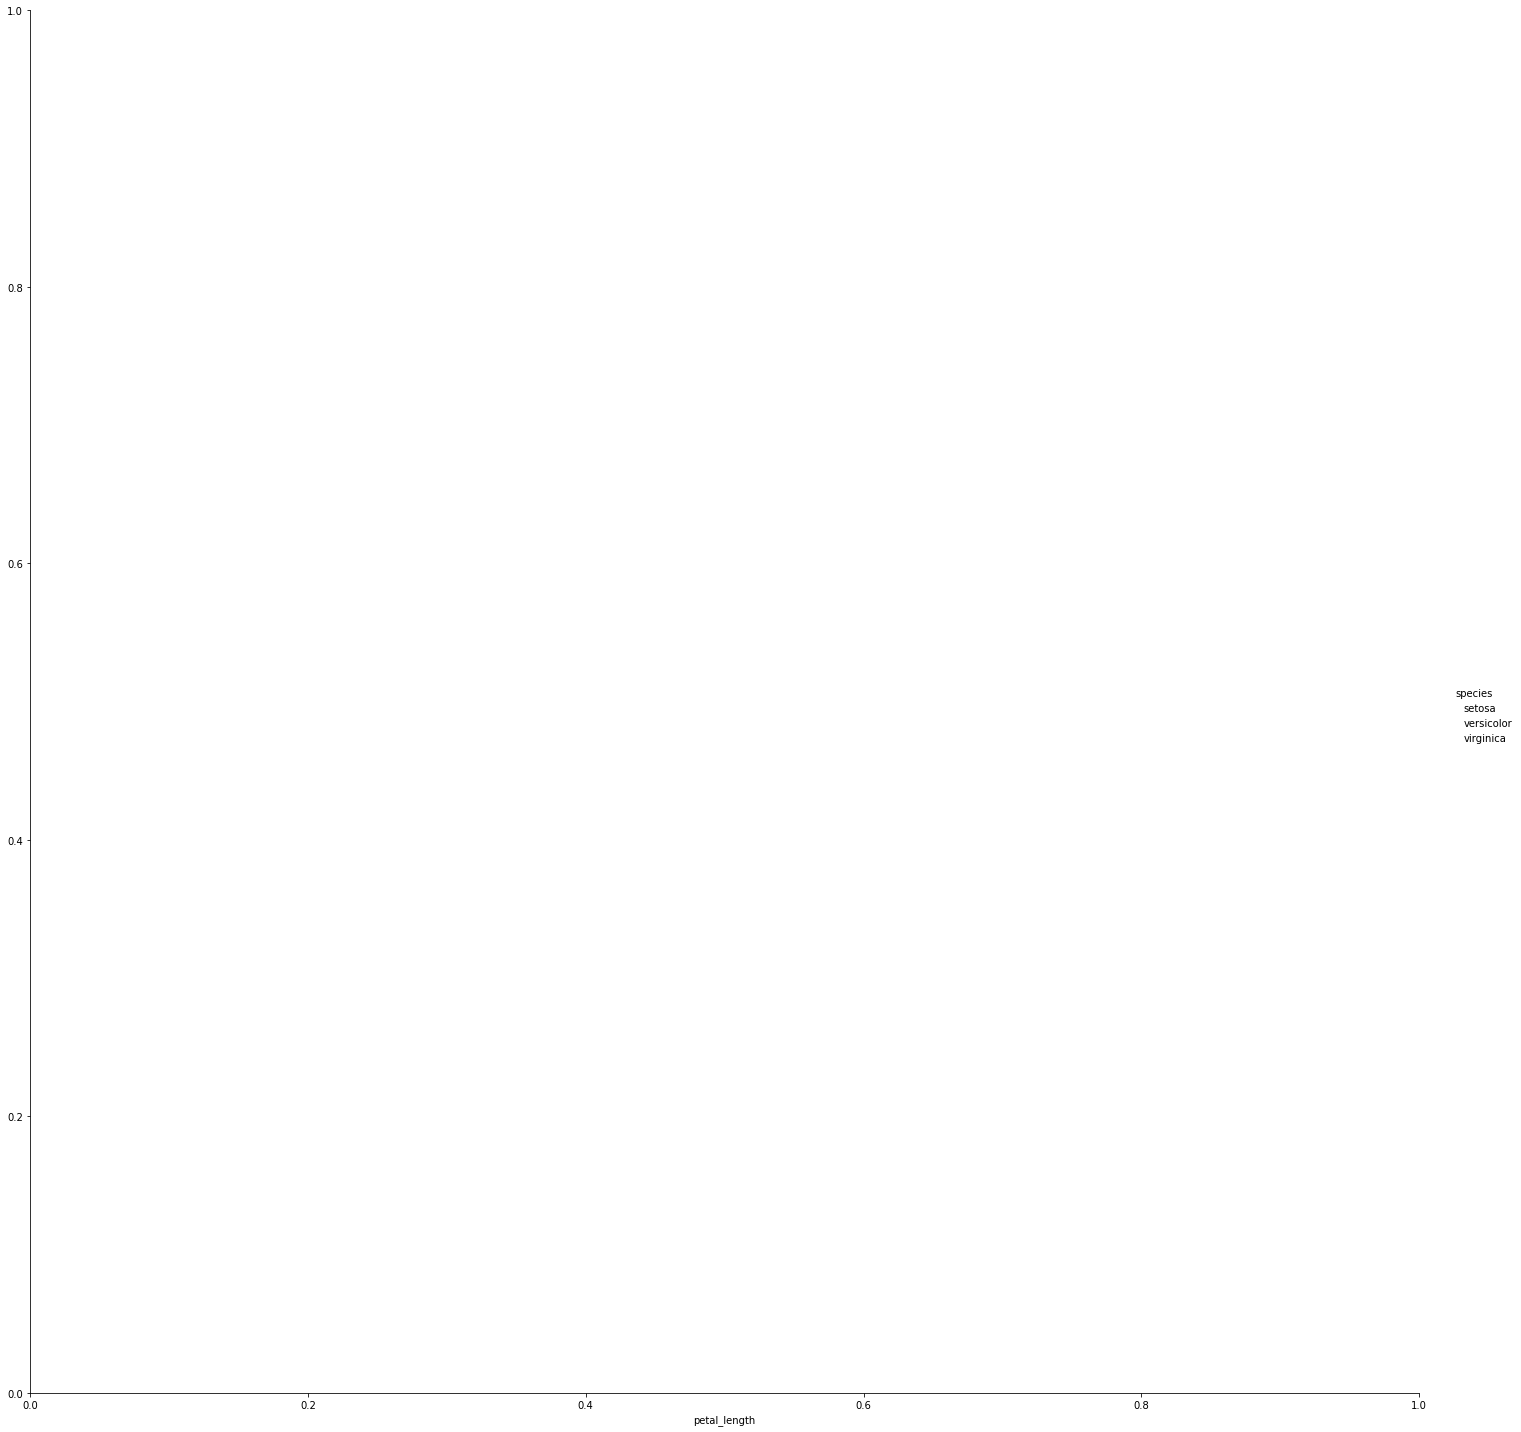

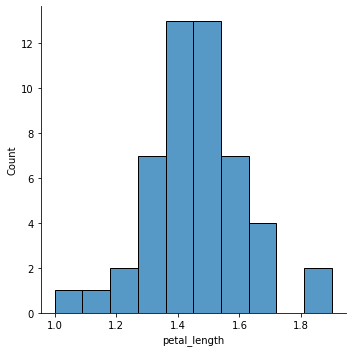

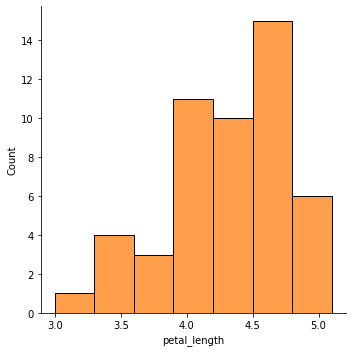

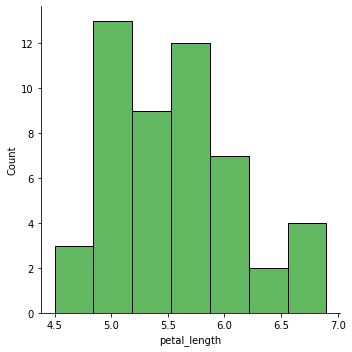

In [23]:
sns.FacetGrid(df, height=20, hue="species").\
map(sns.displot, "petal_length").add_legend();

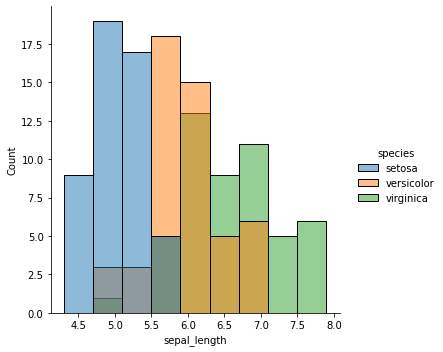

In [25]:
sns.displot(data=df, x="sepal_length", hue="species");

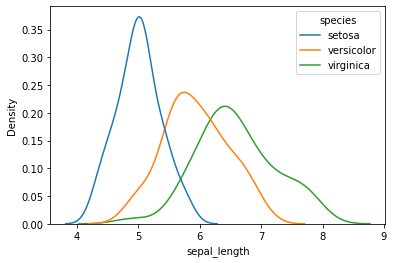

In [26]:
sns.kdeplot(data=df, x="sepal_length", hue="species");

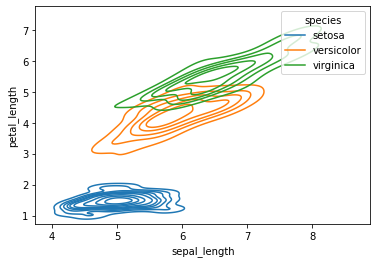

In [30]:
sns.kdeplot(data=df, x="sepal_length", y="petal_length",hue="species");

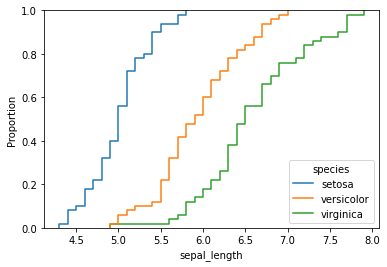

In [31]:
sns.ecdfplot(data=df, x="sepal_length", hue="species");

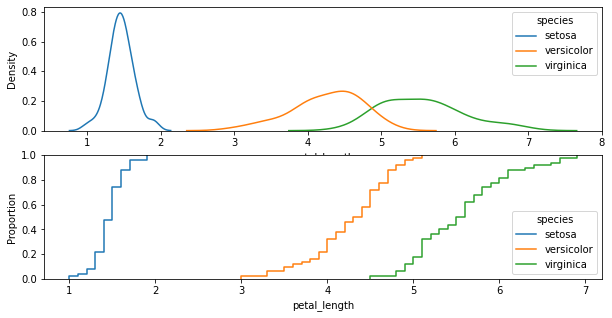

In [37]:
plt.figure(1, figsize=(10,5))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="petal_length", hue="species");
plt.subplot(2,1,2)
sns.ecdfplot(data=df, x="petal_length", hue="species");
plt.show()

In [53]:
def pdfandcdf(feature: str, hue="species"):
  plt.figure(1, figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title(feature)
  sns.kdeplot(data=df, x=feature, hue=hue);
  plt.subplot(1,2,2)
  sns.ecdfplot(data=df, x=feature, hue=hue);
  plt.tight_layout()
  plt.show()

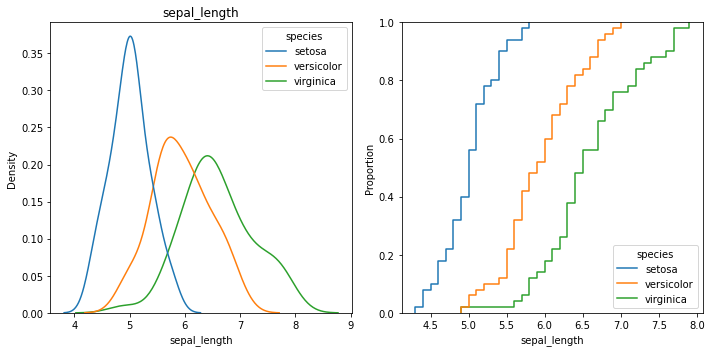

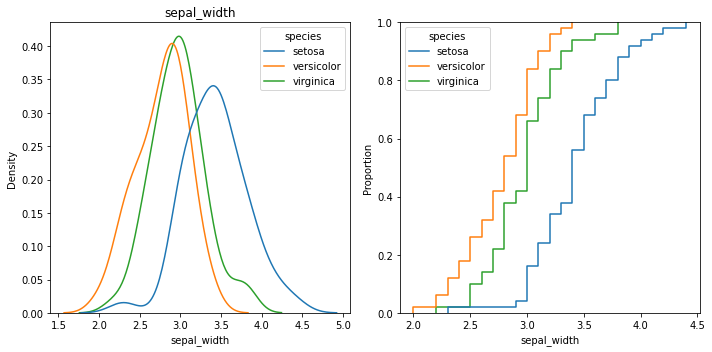

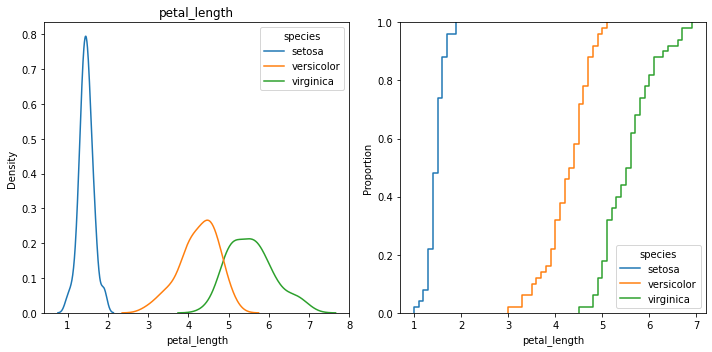

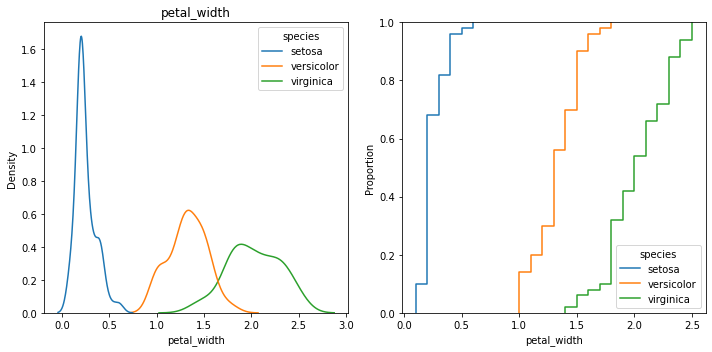

In [54]:
pdfandcdf("sepal_length")
pdfandcdf("sepal_width")
pdfandcdf("petal_length")
pdfandcdf("petal_width")

In [79]:
def pdfandcdfcomb(feature: str, species: str):
  plt.figure(1, figsize=(5,3))
  plt.subplot(1,1,1)
  plt.title(feature)
  sns.kdeplot(data=df.loc[df["species"]==species], x=feature, color="red");
  sns.ecdfplot(data=df.loc[df["species"]==species], x=feature, color="blue");
  plt.tight_layout()
  plt.show()

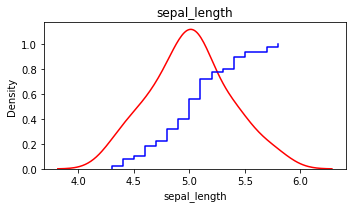

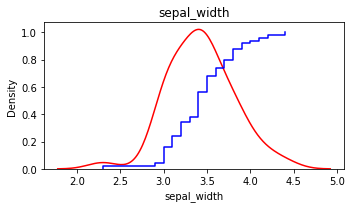

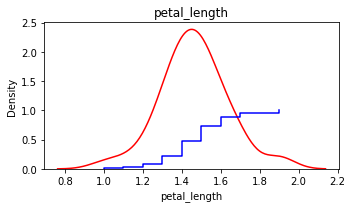

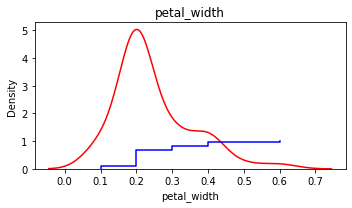

In [82]:
pdfandcdfcomb("sepal_length", "setosa")
pdfandcdfcomb("sepal_width", "setosa")
pdfandcdfcomb("petal_length", "setosa")#cdf says what percent of thigs are below the range
pdfandcdfcomb("petal_width", "setosa")# If we differentiate cdf we get pdf and if we integrate pdf we get cdf

In [86]:
df_setosa = df.loc[df["species"]=="setosa"]
df_versicolor = df.loc[df["species"]=="versicolor"]
df_virginica = df.loc[df["species"]=="virginica"]

In [87]:
df_setosa.shape, df_versicolor.shape, df_virginica.shape

((50, 5), (50, 5), (50, 5))

In [91]:
# Mean , Variance, Std-dev(descriptive statistics)

print(np.mean(df_setosa["petal_length"]))# Setosa flower are smaller than other two species

print(np.mean(df_versicolor["petal_length"]))

print(np.mean(df_virginica["petal_length"]))

# Mean is very badly affected by outlier
print(np.mean(np.append(df_setosa["petal_length"], 1000)))# WE can see only one error corrupted setosa value so badly

1.4620000000000002
4.26
5.552
21.041176470588233


In [92]:
#Std-dev(descriptive statistics)

print(np.std(df_setosa["petal_length"]))# Setosa flower are smaller than other two species

print(np.std(df_versicolor["petal_length"]))

print(np.std(df_virginica["petal_length"]))

# std-deviation is very badly affected by outlier
print(np.std(np.append(df_setosa["petal_length"], 1000)))# WE can see only one error corrupted setosa value so badly

0.17191858538273286
0.4651881339845204
0.5463478745268441
138.4457891732081


In [94]:
#variance(descriptive statistics)

print(np.var(df_setosa["petal_length"]))# Setosa flower are smaller than other two species

print(np.var(df_versicolor["petal_length"]))

print(np.var(df_virginica["petal_length"]))

# variance is very badly affected by outlier
print(np.var(np.append(df_setosa["petal_length"], 1000)))# WE can see only one error corrupted setosa value so badly

0.02955600000000001
0.21640000000000012
0.2984960000000002
19167.23653979239


In [95]:
# Median, Percentile, Quantile, IQR, MAD


print(np.median(df_setosa["petal_length"]))# Setosa flower are smaller than other two species

print(np.median(df_versicolor["petal_length"]))

print(np.median(df_virginica["petal_length"]))


print(np.median(np.append(df_setosa["petal_length"], 1000)))

1.5
4.35
5.55
1.5


In [99]:
from statsmodels import robust



print(robust.mad(df_setosa["petal_length"]))# Setosa flower are smaller than other two species

print(robust.mad(df_versicolor["petal_length"]))

print(robust.mad(df_virginica["petal_length"]))

# mad is not affected by outlier
print(robust.mad(np.append(df_setosa["petal_length"], 1000)));# WE can see median is not affected with outlier

0.14826022185056031
0.5189107764769602
0.6671709983275211
0.14826022185056031


In [101]:
# Percentiles and Quantiles


print(np.percentile(df_setosa["petal_length"], 50))
print(np.percentile(df_versicolor["petal_length"], 50))

print(np.percentile(df_virginica["petal_length"], 50))

print(np.percentile(np.append(df_setosa["petal_length"], 1000), 50))

1.5
4.35
5.55
1.5


In [102]:
# Quantiles(25, 50, 75,100)

print(np.percentile(df_setosa["petal_length"], np.arange(0,101,25)))
print(np.percentile(df_versicolor["petal_length"], np.arange(0,101,25)))

print(np.percentile(df_virginica["petal_length"], np.arange(0,101,25)))

print(np.percentile(np.append(df_setosa["petal_length"], 1000), np.arange(0,101,25)))

[1.    1.4   1.5   1.575 1.9  ]
[3.   4.   4.35 4.6  5.1 ]
[4.5   5.1   5.55  5.875 6.9  ]
[   1.     1.4    1.5    1.6 1000. ]


In [ ]:
# 90th percentile
print(np.percentile(df_versicolor["petal_length"], 90))

In [107]:
# IQR(75th percentile- 25th percentile)(In this short interval 50% points lue)

In [108]:
# Note
# Mean ---> Median
# STD ----> MAD
# Var ----> IQR

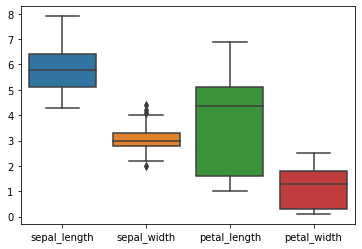

In [109]:
sns.boxplot(data=df)

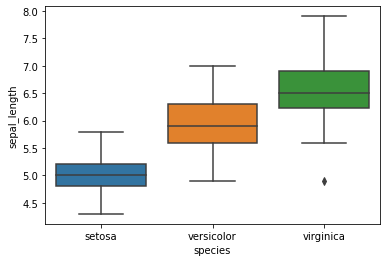

In [114]:
sns.boxplot(data=df, y="sepal_length",x="species");

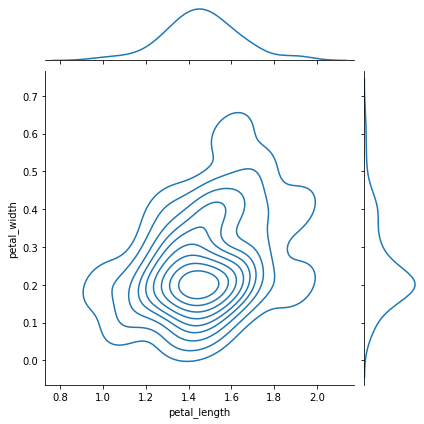

In [117]:
sns.jointplot(x="petal_length", y="petal_width", data=df_setosa, kind="kde")
plt.show()